In [226]:
from sklearn.datasets import fetch_california_housing, load_digits
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from IPython.display import SVG
from graphviz import Source
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

First I will run the analysis on the housing dataset (regression)...

In [238]:
#load in the data
housing = fetch_california_housing()
X = housing.data
y = housing.target

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [239]:
#show a sample of the data
mylist = housing.feature_names.copy()
mylist.append('Price')
dfx = pd.DataFrame(np.concatenate((X,y.T[:,None]), axis=1), columns=mylist)
display(dfx.head())

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,2.344766,0.982143,0.628559,-0.153758,-0.974429,-0.049597,1.052548,-1.327835,4.526
1,2.332238,-0.607019,0.327041,-0.263336,0.861439,-0.092512,1.043185,-1.322844,3.585
2,1.782699,1.856182,1.155620,-0.049016,-0.820777,-0.025843,1.038503,-1.332827,3.521
3,0.932968,1.856182,0.156966,-0.049833,-0.766028,-0.050329,1.038503,-1.337818,3.413
4,-0.012881,1.856182,0.344711,-0.032906,-0.759847,-0.085616,1.038503,-1.337818,3.422


In [240]:
#varying with the max_depth affects accuract of the model
depth_list = range(5,21,3)
min_leaf_list = [0.001, .01, .05]
criterion_list = ['mse', 'mae']

reg = DecisionTreeRegressor(random_state=2)

gs = GridSearchCV(reg, cv=3, verbose=1, iid=False, param_grid={
    'max_depth': depth_list,
    'min_samples_leaf': min_leaf_list,
    'criterion': criterion_list
    })

gs.fit(X, y)
print('im done')

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


im done


[Parallel(n_jobs=1)]: Done 108 out of 108 | elapsed:  5.5min finished


In [241]:
print (gs.best_params_)

{'criterion': 'mse', 'max_depth': 11, 'min_samples_leaf': 0.01}


In [236]:
display(gs.cv_results_)

{'mean_fit_time': array([ 0.04635124,  0.0401    ,  0.0338522 ,  0.06015053,  0.05390234,
         0.03697648,  0.0739532 ,  0.05173998,  0.03906655,  0.08416376,
         0.05679169,  0.03585882,  0.08190041,  0.05601435,  0.03385677,
         0.08220506,  0.05243139,  0.0347106 ,  8.62790136,  8.29553995,
         7.36375327,  9.1352026 ,  8.76191406,  7.48854218,  9.35230966,
         8.79298697,  7.56104889, 10.77907395,  8.78181   ,  7.46338325,
         9.45743051,  8.76511211,  7.42319613,  9.38150115,  8.83187084,
         7.98160634]),
 'std_fit_time': array([0.00904181, 0.00601852, 0.00819233, 0.00876837, 0.00498201,
        0.00948304, 0.0064022 , 0.00292204, 0.00726952, 0.00363263,
        0.0078533 , 0.00388885, 0.00374763, 0.00466656, 0.00365875,
        0.00352102, 0.00307796, 0.00466717, 0.51856574, 0.49731118,
        0.48613999, 0.48290653, 0.48389602, 0.49771951, 0.44129128,
        0.52883865, 0.50037293, 0.90656219, 0.47154581, 0.50600164,
        0.43526197, 0.488

In [242]:
data_summary = pd.DataFrame(gs.cv_results_)[['param_criterion','param_max_depth','param_min_samples_leaf','mean_test_score','rank_test_score']]
display(data_summary.sort_values('rank_test_score').head(20))

,param_criterion,param_max_depth,param_min_samples_leaf,mean_test_score,rank_test_score
10,mse,14,0.01,0.568458,1
7,mse,11,0.01,0.568458,1
16,mse,20,0.01,0.568458,1
13,mse,17,0.01,0.568458,1
4,mse,8,0.01,0.567579,5
24,mae,11,0.001,0.546536,6
31,mae,17,0.01,0.545373,7
25,mae,11,0.01,0.545373,7
34,mae,20,0.01,0.545373,7
28,mae,14,0.01,0.545373,7


In [237]:
data_summary = pd.DataFrame(gs.cv_results_)[['mean_fit_time','mean_score_time','mean_test_score','rank_test_score']]
display(data_summary.sort_values('rank_test_score').head(20))

,mean_fit_time,mean_score_time,mean_test_score,rank_test_score
27,10.779074,0.000000,0.555208,1
24,9.352310,0.001603,0.554153,2
30,9.457431,0.000000,0.553747,3
33,9.381501,0.000000,0.552145,4
6,0.073953,0.000000,0.546929,5
21,9.135203,0.000000,0.545968,6
9,0.084164,0.000407,0.544206,7
15,0.082205,0.000812,0.544060,8
12,0.081900,0.000000,0.544051,9
13,0.056014,0.000000,0.533067,10


Text(0.5, 1.0, 'Model Accuracy by Leaf Size and Tree Depth')

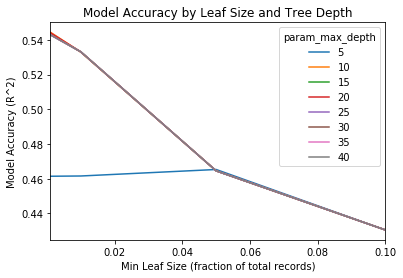

In [221]:
data_pivot = data_summary.pivot(index='param_min_samples_leaf', columns='param_max_depth', values='mean_test_score')
data_pivot.plot()
plt.xlabel('Min Leaf Size (fraction of total records)')
plt.ylabel('Model Accuracy (R^2)')
plt.title('Model Accuracy by Leaf Size and Tree Depth')

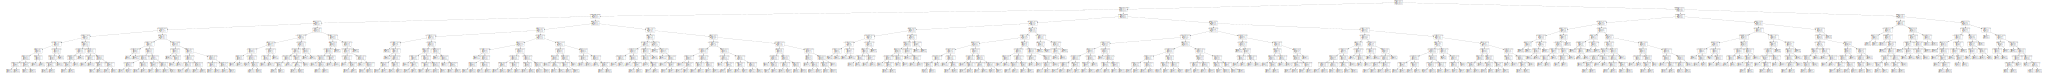

In [170]:
graph = Source( tree.export_graphviz(gs.best_estimator_, 
                                     out_file=None, 
                                     feature_names=housing.feature_names, 
                                     class_names = housing.target
                                    )
              )
SVG(graph.pipe(format='svg'))

Then I will run it on the mnist dataset...

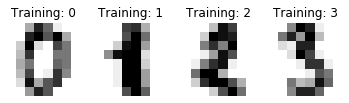

In [244]:
#load in the data
digits = load_digits()

#show ample digits
#taken from: https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html#sphx-glr-auto-examples-classification-plot-digits-classification-py
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

In [245]:
#no need to scale this data
X = digits.data
y = digits.target
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)
print(X.shape)

print(digits.keys())

(1797, 64)
dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])


In [247]:
#varying with the max_depth affects accuract of the model
depth_list = range(1,21)
min_leaf_list = [0.001,.01,.02,.05]

clf = DecisionTreeClassifier(random_state=2)

gs = GridSearchCV(clf, cv=3, iid=False, param_grid={
    'max_depth': depth_list,
    'min_samples_leaf': min_leaf_list
    })

gs.fit(X, y)
print('im done')

im done


In [248]:
print (gs.best_params_)

{'max_depth': 9, 'min_samples_leaf': 0.001}


In [249]:
data_summary = pd.DataFrame(gs.cv_results_)[['param_max_depth','param_min_samples_leaf','mean_test_score','rank_test_score']]
display(data_summary.sort_values('rank_test_score').head(20))

,param_max_depth,param_min_samples_leaf,mean_test_score,rank_test_score
32,9,0.001,0.770783,1
36,10,0.001,0.770249,2
52,14,0.001,0.770218,3
48,13,0.001,0.770218,3
44,12,0.001,0.770218,3
72,19,0.001,0.769111,6
68,18,0.001,0.769111,6
76,20,0.001,0.769111,6
56,15,0.001,0.769111,6
64,17,0.001,0.769111,6
